     Introduction to Quantitative Finance 
Estimating Value at Risk for Novo Nordisk Stock in Python

Value at Risk, in simple terms, is the maximum amount of money an investor could potentially lose on an investment 
within a specific time frame and with a certain degree of confidence. It helps investors assess the downside risk 
associated with a particular investment at a given point in time.


In [14]:
# Importing packages
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats=["png"]

In [15]:
# Importing stock data from Yahoo Finance for Novo Nordisk

nvo = yf.Ticker("NVO")                # Creating a ticker object for Novo Nordisk
df = nvo.history(period="max")        # Retrieving historical stock data for Novo Nordisk and storign to dataframe (df)
df.tail(5)                            # Displaying the last 5 rows of the DataFrame (recent date)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-13 00:00:00-04:00,134.240005,135.500000,132.699997,133.490005,6847000,0.0,0.0
2024-03-14 00:00:00-04:00,135.850006,135.919998,133.869995,134.580002,3506900,0.0,0.0
2024-03-15 00:00:00-04:00,133.880005,134.000000,131.860001,132.369995,3777700,0.0,0.0
2024-03-18 00:00:00-04:00,131.570007,133.750000,131.070007,132.889999,3898800,0.0,0.0
2024-03-19 00:00:00-04:00,132.039993,132.210007,130.509995,131.369995,4389900,0.0,0.0


In [3]:
df.head(5)                           # Displaying the first 5 rows of the DataFrame

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1981-04-30 00:00:00-04:00,0.0,0.091706,0.090995,0.090995,16760000,0.0,0.0
1981-05-01 00:00:00-04:00,0.0,0.095260,0.093483,0.093483,15180000,0.0,0.0
1981-05-04 00:00:00-04:00,0.0,0.092417,0.091706,0.091706,3340000,0.0,0.0
1981-05-05 00:00:00-04:00,0.0,0.092061,0.090995,0.090995,12560000,0.0,0.0
1981-05-06 00:00:00-04:00,0.0,0.094549,0.093127,0.093127,15700000,0.0,0.0


One can confidently see that as of April 30th, 1981, the closing price of the NVO stock was USD0.09, and it is currently trading at USD133.49 as of March 13th, 2024.


Text(0, 0.5, 'Historical stock price')

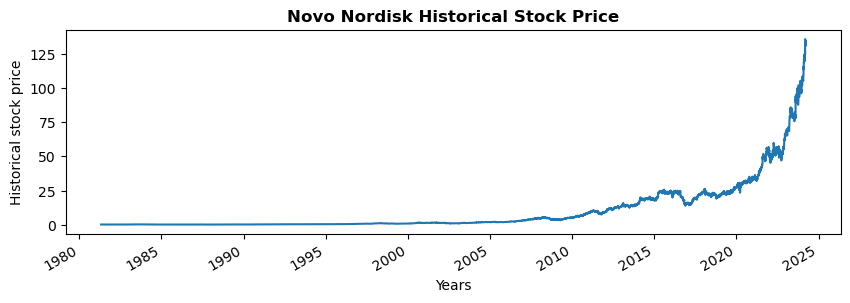

In [4]:
# Creating a figure object and setting its size
fig = plt.figure()
fig.set_size_inches(10, 3)

# Plotting the closing prices of NovoNordisk stock
df["Close"].plot()              
plt.title("Novo Nordisk Historical Stock Price", weight="bold")
plt.xlabel ("Years")
plt.ylabel ("Historical stock price")


Text(0.5, 1.0, 'Novo Nordisk daily log returns')

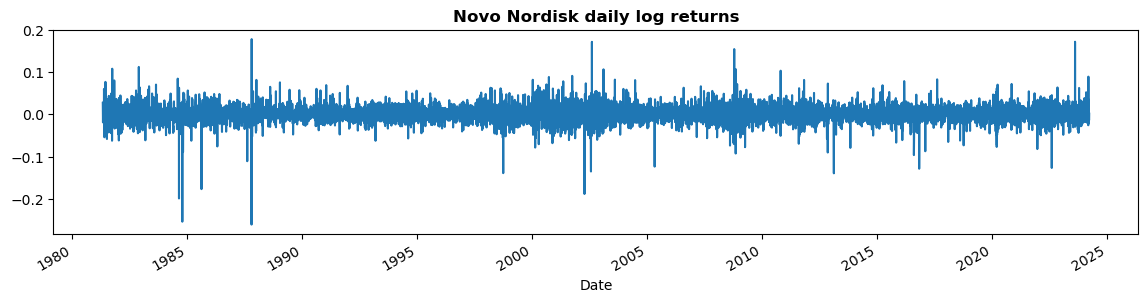

In [5]:
# COMPUTING THE DAILY LOG RETURNS TO UNDERSTAND HOW MUCH THE STOCK HAS GROWN OR DECLINED OVER THE PERIOD

fig= plt.figure()
fig.set_size_inches(14, 3)
df["Close"].pct_change().plot()
plt.title("Novo Nordisk daily log returns",weight="bold")

0.018368771300146542

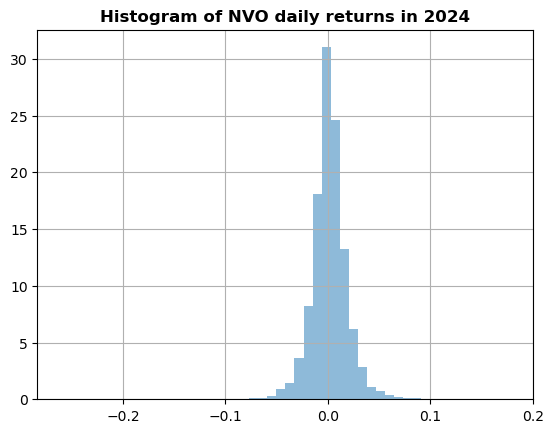

In [6]:
# LETS plots a histogram for the distribution 
df["Close"].pct_change().hist(bins=50, density=True, histtype="stepfilled", alpha=0.5)
plt.title("Histogram of NVO daily returns in 2024", weight="bold")
df["Close"].pct_change().std()

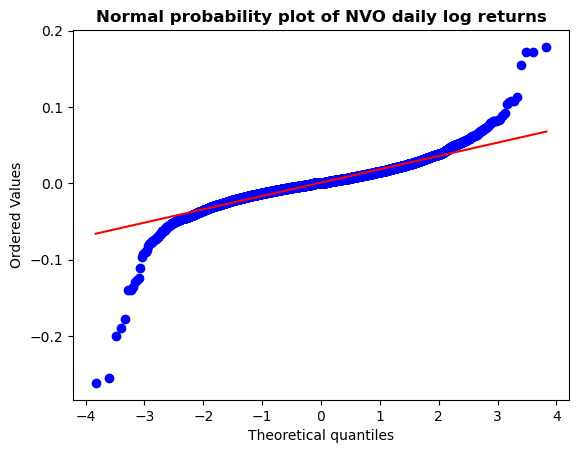

In [7]:
# QQ plot for a test for normality 
data = df["Close"].pct_change().dropna()
scipy.stats.probplot(data, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal probability plot of NVO daily log returns", weight="bold")
plt.show()

Text(0.5, 1.0, 'Daily returns of NVO')

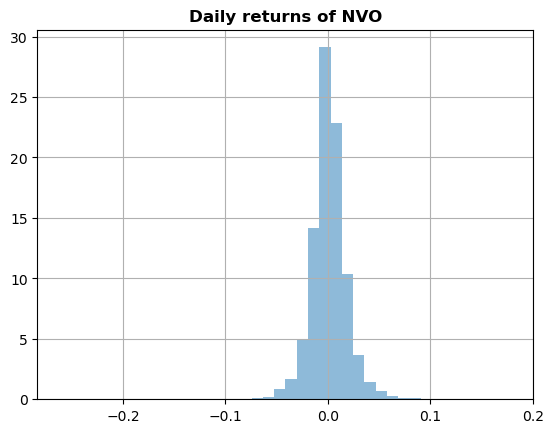

In [8]:
#Value at Risk 
returns = df["Close"].pct_change().dropna()
mean = returns.mean()
sigma = returns.std()

tdf, tmean, tsigma = scipy.stats.t.fit(returns)
returns.hist(bins=40, density = True, histtype = "stepfilled", alpha=0.5)
plt.title("Daily returns of NVO", weight = "bold")


In [9]:
returns.quantile(0.05)

-0.02585396636789994

At 5%, the empiical quantile of the daily stock return for NVO is at -0.026. 
This means that with a 95% confidence, the worst daily loss will not exceed 2.6%. 
If one invests 1M, at 0.05, the Value at Risk (VaR) is 0.026*1M = 26,000


In [10]:
returns.quantile(0.01)

-0.04531499404122593

At 1%, the empirical quantiel of the daily stock retun for NVO is at -0.045. 
This means that with a 99% confidence, the worst daily loss will not exceed 4.5%


In [11]:
# VaR using Monte Carlo method

# Number of trading days
days = 256

# Time increment
dt = 1 / float(days)

# implied Volatility of the stock
sigma = 0.273

# Average growth rate (mu)
mu = 0.51


In [12]:
# Monte carlo simulation
def random_walk(startprice):
    price = np.zeros(days)
    shock  = np.zeros(days)
    price[0] = startprice
    for i  in range(1, days):
        shock[i] = np.random.normal(loc = mu*dt, scale = sigma*np.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i]*price[i-1])
    return price

Text(0.5, 1.0, 'A monte carlo simulation')

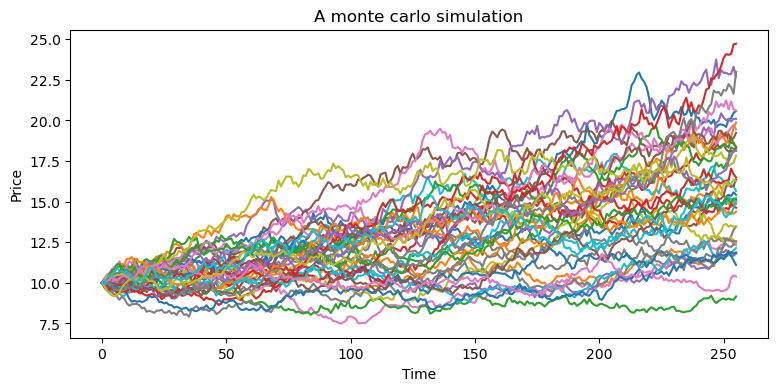

In [13]:
plt.figure(figsize=(9,4))
for run in range(40):
    plt.plot(random_walk(10.0))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("A monte carlo simulation")

The final spread out of the stock is between 5.0 and 32.6. This means the the expected value yields a profit. This is due to the fact that the drift in the random walk is positive. 